# Analiza hiš

V tem besedilu bom analiziral hiše, ki so bile zajete (27. 10. 2021) iz spletne strani [NEPREMICNINE.net](https://www.nepremicnine.net/oglasi-prodaja/hisa/) to bodo hiše iz Slovenije in Hrvaške. 

In [2]:
import pandas as pd
import os.path
pd.options.display.max_rows = 15 #zaradi preglednosti nastavimo max št. vrstic na 15
%matplotlib inline
hise = pd.read_csv(os.path.join("hise.csv"), index_col="id")
hise = hise[(hise.cena > 10000)] #nekatere cene so cene na m^2 ali pa so cene kot 1€. Te hiše že takoj na začetku izločimo iz naše analize
hise

,kraj,leto,cena,agencija,opis,nadstropja,povrsina_zemljisca,povrsina_hise,ima_klet,drzava
id,,,,,,,,,,
6387983,BODEŠČE,1800,265000,Zasebna ponudba,"300 m2, samostojna, zgrajena l. 1800, adaptira...",K+P+1+M,700.0,300.0,True,Slovenija
6439981,BOGOJINA,1960,44000,Dom M5 d.o.o.,"67,3 m2, samostojna, zgrajena l. 1960, 425 m2 ...",K+P,425.0,67.0,True,Slovenija
6320190,BREZOVICA PRI LJUBLJANI,2007,420000,ABC nepremičnine d.o.o.,"495 m2, dvostanovanjska, zgrajena l. 2007, pro...",NaN,NaN,495.0,NaN,Slovenija
6409203,CELJE,2021,315000,"Bfa skupina, d.o.o.","205 m2, samostojna, novogradnja, začetek gradn...",P+1,600.0,205.0,False,Slovenija
6427182,ČRNA VAS,2016,390000,"MP PROJEKT, d.o.o., PE Ljubljana","100,2 m2, dvojček, zgrajen l. 2016, 262 m2 zem...",NaN,262.0,100.0,NaN,Slovenija
...,...,...,...,...,...,...,...,...,...,...
5916801,ŽABORIĆ,1989,800000,D5 Ing d.o.o.,"650 m2, hiša, zgrajena l. 1989, adaptirana l. ...",K+P+1+2,NaN,650.0,True,Hrvaska
6426574,ŽBANDAJ,2008,525000,"QUDOS, center nepremičnin d.o.o.","444,2 m2, samostojna, zgrajena l. 2008, 1.450 ...",K+P+1,1450.0,444.0,True,Hrvaska
6418130,ŽESTILAC,1980,259000,"Aeon nepremičnine, d.o.o.","125 m2, dvostanovanjska, zgrajena l. 1980, ada...",NaN,1103.0,125.0,NaN,Hrvaska


Vseh hiš, ki so ustrezale našemu pogoju je še vedno 4627 (zadosti, da nadaljujemo analizo). 

## Kje so najdražje hiše?

Za začetek bomo pogledali v katerem kraju je m^2 napremičnine najdražji. Naša hipoteza napoveduje, da bodo cene na m^2 najdražje v Ljubljani. Definiramo:
<center><i>razmerje = cena / povrsina hise </i></center>

Tako bomo pri vsaki hiši izračunali ceno na m^2.

In [3]:
razmerje = hise["cena"] / hise["povrsina_hise"]
hise["razmerje"] = razmerje

In [4]:
normalne_hise = hise[hise.povrsina_hise > 20] #omejimo se samo na hiše z več kot 20 m^2, saj je večina hiš z manjšimi vrednosti neprava vrednost, ki kvari statistiko.
h = normalne_hise.groupby("kraj")
cena_na_m2 = h.mean()[h.size() > 2]  #omejimo se še na tiste kraje v katerih so vsaj 3 hiše na ponudbi, saj tudi tisti z eno lahko preveč izstopajo.
cena_na_m2.sort_values("razmerje")["razmerje"].tail(10)

kraj
TOPOL PRI MEDVODAH    3822.914527
SAVUDRIJA             3971.290947
CRVENI VRH            4087.282063
DAJLA                 4231.024612
BLED                  4311.577419
SEČOVLJE              4331.057675
PORTOROŽ              4570.643294
MURGLE, TRNOVO        4683.950050
STRUNJAN              5940.416667
JAGODJE               6867.104424
Name: razmerje, dtype: float64

Presenetljivo nam podatki pokažejo, da so cene na m^2 najdražje v Jagodjah na slovenski obali. Tudi par naslednjih krajev (Strunjan, Portorož in Sečovlje) so na slovenski obali. Delno pa smo napovedali tudi pravilno, saj Murgle ter Trnovo zasedata tretjo mesto.

Sedaj pa si poglejmo v katerem kraju je cena povprečne hiše najdražja. Naša hipoteza je bila, da bo to nekje na slovenski obali.

In [5]:
cena_na_m2.sort_values("cena")["cena"].tail(10)

kraj
VODICE        1.021222e+06
SAVUDRIJA     1.050647e+06
JAGODJE       1.106667e+06
MALIJA        1.136667e+06
OPRIČ         1.262667e+06
LJ. CENTER    1.296250e+06
PORTOROŽ      1.296750e+06
KAMPEL        1.380000e+06
BLED          1.593400e+06
IČIĆI         1.923333e+06
Name: cena, dtype: float64

Najdražje hiše lahko kupimo v Ičićih na Hrvaškem, kjer je povprečna cena za hišo skoraj dva milijona evrov. Če pa ne vemo kam bi s svojimi milijoni in bi radi kupili hišo v Sloveniji je prava lokacija Bled, slovenska obala (tokrat Kampel in Portorož) ali pa hiša v centu Ljubljane.

Izpostavil bi primerjavo med Jagodjem in Kamplom (oba kraja sta na slovenski obali). Iz analize razberemo, da so v Kamplu očitno hiše z veliko večjo površino, medtem ko so v Jagodjah manjše a zato ne preveč cenejše.

<AxesSubplot:xlabel='kraj'>

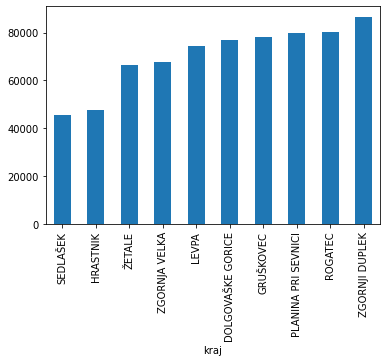

In [6]:
najcenejše_hiše_po_krajih = cena_na_m2.sort_values("cena")["cena"].head(10)
najcenejše_hiše_po_krajih.plot.bar()

Najcenejše hiše pa lahko dobimo v Sedlašku, kjer je cena za povprečno hišo "samo" 45.333€. 

Dodatno si poglejmo še kateri kraji imajo največjo vrednost svojih nepremičnin (ki se trenutno prodajajo).

In [7]:
h.sum()[h.size() > 2].sort_values("cena")["cena"].tail(10)

kraj
BLED          15934000
MEDULIN       16669000
SAVUDRIJA     18911646
PORTOROŽ      25935000
CRIKVENICA    30505000
POREČ         30741375
NOVIGRAD      40457500
UMAG          43526802
KRK           57014000
MALINSKA      57489000
Name: cena, dtype: int64

Na vrhu so hrvaška mesta. Prvi slovenski kraj pa je Portorož.

Da zaključimo s poglavjem o cenah hiš glede na lokacije. 
Ovrgli smo našo prvo hipotezo, saj so najdražje hiše na m^2 v Jagodjah in ne v Ljubljani.
Drugo hipotezo pa smo delno potrdili, čeprav so najdražje hiše v Ičićih na Hrvaškem sta na drugem in tretjem mestu dva kraja iz slovenske obale.

## Kako cene hiš padajo ali naraščajo skozi čas

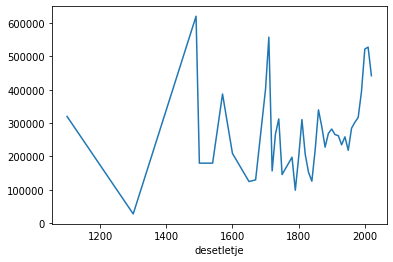

In [8]:
hise['desetletje'] = 10 * (hise.leto // 10)

hise_po_desetletjih = hise.groupby("desetletje")
b = hise_po_desetletjih.mean()["cena"].plot()

Kot vidimo iz grafa, cene ne naraščajo linearno. Ker je starih hiš bolj malo , cene hitreje bolj nihajo. Zato je smiselno, da bolj podrobno pogledamo hiše, ki niso starejše od 100 let. 

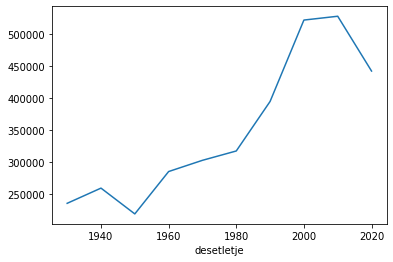

In [9]:
nove_hise = hise[hise.desetletje > 1920]
hise_po_desetletjih = nove_hise.groupby("desetletje")
b = hise_po_desetletjih.mean()["cena"].plot()

Tu vidimo, da starejša kot je hiša, cenejša bo. Kar se zdi smiselno. Opazimo pa v zadnejm desetletju občuten padec cen, ki ceno novogradnje postavi pod tiste hiše, ki so stare 10-20 let.

## Ali se splača imeti več nadstropji?

In [10]:
hise_klet = hise.groupby("ima_klet")
hise_klet.mean()

,leto,cena,povrsina_zemljisca,povrsina_hise,razmerje,desetletje
ima_klet,,,,,,
False,1978.228932,368296.331785,2153.721083,201.762442,3286.197595,1975.009954
True,1968.139942,350174.315841,3180.255624,257.072886,6699.041046,1964.353741


Hiše s kletjo so v povprečju starejše, večje in presenetljivo cenejše. Očitno tukaj glavno vlogo odigra dejstvo, da so hiše, ki imajo klet, v povprečju starejše (zato tudi cenejše) in da dodatni kvadratni metri v kleti niso tako cenjeni kot tisti v pritličju ali drugih nadstropjih.

In [11]:
def stevilo_nadstropij(nadstropja):
    niz = str(nadstropja)
    if "P" in niz:
        return len(niz.split("+"))
    else:
        return None

In [12]:
st_nadstropij = hise["nadstropja"].apply(stevilo_nadstropij)
hi = pd.merge(st_nadstropij, hise, left_on="id", right_on="id").groupby("nadstropja_x")
hi.mean()["cena"]

nadstropja_x
1.0    366525.690476
2.0    327663.499064
3.0    368608.771157
4.0    451737.404255
5.0    487285.714286
Name: cena, dtype: float64

<AxesSubplot:xlabel='nadstropja_x'>

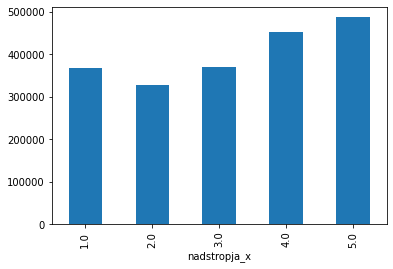

In [13]:
hi.mean()["cena"].plot.bar(x='nadstropja_x', y='cena')

Hiše z več nadstropji so praviloma res dražje kot tiste z manj. Edina izjema so hiše s samo enim nadstropjem oziroma samo s pritličjem. Te so namreč v povprečju dražje kot tiste z dvema in celo tiste s tremi nadstropji.

## Agencije, ki prodajajo hiše

In [14]:
hise = hise.drop(columns=["razmerje", "desetletje"])

In [15]:
hise_po_agencijah = hise.groupby("agencija")
hise_po_agencijah.size().sort_values().tail(10)

agencija
MESTO NEPREMIČNIN d.o.o.                             70
Nepremičninska družba, d.o.o., PE RE/MAX Premium     75
Vitus d.o.o.                                         76
Casa de mar nekretnine d.o.o.                        77
RE/MAX Ljubljana, Nepremičninska družba d.o.o.       83
Market center Omnis d.o.o.                          103
Opereta d.o.o.                                      117
Premium SM d.o.o.                                   125
Sonce skupina d.o.o., PE Ljubljana                  292
Zasebna ponudba                                     524
dtype: int64

Največ ljudi prodaja nepremičnine brez posrednika. Agencija, ki ima trenutno na Nepremicnine.net največ oglasov za hiše, pa je Sonce skupina d.o.o., PE Ljubljana z okoli 300 hišami. 

In [16]:
hise_po_agencijah_povprečja = hise_po_agencijah.mean()
hise_po_agencijah_povprečja.sort_values("cena")["cena"].head(5)

agencija
Stanovanjski sklad RS                    19100.000000
Občina Komen                             27000.000000
Ministrstvo za javno upravo              27536.500000
PETRA NEPREMIČNINE Petra Anzeljc s.p.    35000.000000
ARTOURE Jana Dolenc s.p.                 39333.333333
Name: cena, dtype: float64

Opazimo, da v povprečju najcenejše hiše prodaja Stanovanjski sklad RS po povprečno samo 19.100€, kar je za hišo resnično niska cena. Naslednji pa so državni, ali občinski ponudniki, katere povprečne ceno za hišo so pod 30.000 €. 

In [17]:
hise_po_agencijah_povprečja.sort_values("cena")["cena"].tail(5)

agencija
Reconsult & Partners d.o.o.                                               1500000.0
Port, d.o.o. Portorož                                                     1595000.0
N-invest d.o.o.                                                           1742500.0
Returnet, nepremičnine in poslovno svetovanje, Jana Klenar Aydin, s.p.    2000000.0
Viping d.o.o.                                                             3800000.0
Name: cena, dtype: float64

Agencija pri kateri najdemo povprečno najdražje hiše je Viping d.o.o. Pri kateri je povprečna cena hiše skoraj štiri milijone.

## Kako na ceno vpliva razmerje med površino hiše in površino zemljišča? 

Njaprej razjasnimo, kaj nam pove razmerje med površino hiše in površino zemljišča.

$r = h / z$

* $r$ = razmerje
* $h$ = površina hiše
* $z$ = površina zemljišča

Torej $r \isin [0,\infty)$ . 

Če $r \isin [0 , 1]$, potem je površina hiše manjša kot površina zemljišča. (Hiša ima vrt, ali drugo zemljo.) 

Če pa je $r \isin (1,\infty)$ potem je površina hiše večja kot površina zemljišča. V tem primeru hiša najbrž nima vrta ima pa več nadstropij.   

<AxesSubplot:xlabel='r', ylabel='cena'>

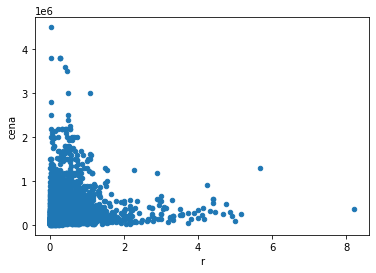

In [18]:
normalne_hise = hise[(hise.povrsina_hise > 20) & (hise.povrsina_zemljisca > 20)].copy()
r = normalne_hise.povrsina_hise / normalne_hise.povrsina_zemljisca
normalne_hise["r"] = r
normalne_hise.plot.scatter("r", "cena")

Največ hiš se nahaja v kvadratu $[0,1] \times [0,1]$ sepravi največ hiš ima tudi vrt ali vsaj večjo površino zemljišča, kot površino hiše. Poleg tega pa njihova cena ne presega milijona, kar tudi ni zares presenetljivo.

Kakorkoli pa bi lahko trdili, da cene z razmerjem v splošnem padajo. Torej večji kot je $r$ manjše so cene. Le malo hiš je takih, ki imajo razmerje večje od 1 in cene večje kot milijon. Te si lahko ogledamo na naslednjem grafu, na katerem so le tiste hiše, ki so dražje kot milijon evrov in imajo $r$ večji od 1.

<AxesSubplot:xlabel='r', ylabel='cena'>

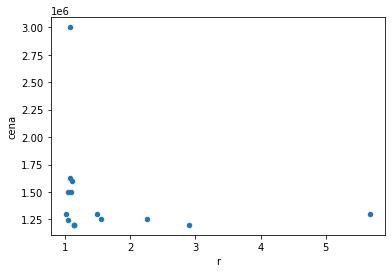

In [19]:
normalne_hise[(normalne_hise.cena > 1000000) & (normalne_hise.r > 1)].plot.scatter("r", "cena")

Na grafu izstopata dve hiši. Prva (levo zgoraj) je zelo draga hiša, ki ima površino hiše le malo večjo kot površino zemljišča. Druga (desno spodaj) pa je hiša, ki stane malo več kot milijon a ima skoraj 6-krat večjo površino hiše kot površino zemljišča. Ta hiša ima sigurno več nadstropij in zelo malo (če ga sploh ima) vrta.  

Zanimivo bi se mi zdelo pogledati še podatek o tem, kakšno je povprečno razmerje.

In [20]:
normalne_hise.mean(axis = 0, numeric_only=True)["r"]

0.43437787026696334

Povprečna hiša ima razmerje med površino hiše in površino zemljišča $0,44$ , kar je malo manj kot $0,5$ , kjer bi bila površina zemljišča ravno dvakrat večja kot površina zemljišča.
Torej ima povprečna hiša površino vrta oz. drugega zemljišča, ki ni hiša, malo več kot pa je površina hiše.  

## Kakšna je verjetnost, da bo v opisu hiše določena beseda?

V tem poglavju nas bo znaimala verjetnost, da se v opisu hiše pojavijo besede kot so "mirna okolica", " zeleno okolje"... Pogledali si bomo še za koliko so hiše s takimi besedami dražje ali cenejše od povprečja.

In [21]:
def je_v_opisu(opis, beseda):
    return beseda in opis

def verjetnost_v_opisu_beseda(beseda):
    hise_z_besedo = hise["opis"].apply(je_v_opisu, beseda=(beseda))
    return hise[hise_z_besedo]["cena"].count() / hise["opis"].count() 

In [22]:
verjetnost_v_opisu_beseda("m2")

1.0

In [23]:
verjetnost_v_opisu_beseda("samostojna hiša")

0.01383185649448887

"m2" se pojavi kar v vsakem opisu besed.

Pri iskanju besed, ki so v povezavi z mirom, si bomo namesto da pišemo "mirna okolica" ali "mirno okolje". Delo poenostavili in poiskali kar vse, ki vsebujejo "mir". Podobno pri besednih zvezah "zelena okolica" in "zeleno okolje".

In [24]:
verjetnost_v_opisu_beseda("zelen")

0.004970823427706938

In [25]:
verjetnost_v_opisu_beseda("mir")

0.046034147395720766

In [26]:
verjetnost_v_opisu_beseda("morje")

0.022260644045818026

In [27]:
hise_z_besedo_mir = hise["opis"].apply(je_v_opisu, beseda=("mir"))
hise_z_besedo_zelen = hise["opis"].apply(je_v_opisu, beseda=("zelen"))
hise_z_besedo_morje = hise["opis"].apply(je_v_opisu, beseda=("morje"))

In [28]:
{"vse hiše" : hise["cena"].mean(),
"mir" : hise[hise_z_besedo_mir]["cena"].mean(),
"zelen" : hise[hise_z_besedo_zelen]["cena"].mean(),
"morje" : hise[hise_z_besedo_morje]["cena"].mean()}

{'vse hiše': 374673.7994380808,
 'mir': 332007.06103286386,
 'zelen': 353084.7826086957,
 'morje': 594884.3106796116}

Hiše, ki imajo v opisu besedi "mir" ali "zelen" so v povprečju cenejše kot ostale hiše. Medtem ko so hiše, ki v opisu vsebujejo besedo "morje" precej dražje, kot tiste, ki je ne vsebujejo.

## Cene hiš po regijah

Iz spletne strani www.postnestevilke.com smo zajeli podatke o tem kakšne poštne številke imajo kraji. Tem bomo z naslednjo funkcijo priredili okoliš večjega mesta (tako kot so razdeljene po poštnih številkah).

In [29]:
postne = pd.read_csv(os.path.join("postne.csv"))
skupna = pd.merge(postne, hise, left_on='kraj', right_on="kraj")

In [30]:
def funkcija_regije(postna_stevilka):
    st = postna_stevilka // 1000
    if st == 1:
        return "Ljubljana"
    elif st == 2:
        return "Maribor"
    elif st == 3:
        return "Celje"
    elif st == 4:
        return "Kranj"
    elif st == 5:
        return "Nova Gorica"
    elif st == 6:
        return "Koper"
    elif st == 8:
        return "Novo Mesto"
    elif st == 9:
        return "Murska Sobota"

skupna["okolis"] = skupna["postna_stevilka"].apply(funkcija_regije)
hise_po_okolisih = skupna.groupby("okolis")
hise_po_okolisih.mean().sort_values("cena")["cena"]

okolis
Murska Sobota    122808.966667
Maribor          191078.043478
Novo Mesto       198654.451220
Nova Gorica      203816.666667
Celje            299422.349593
Koper            306970.694444
Ljubljana        388810.095506
Kranj            515130.238095
Name: cena, dtype: float64

V tabeli zgoraj so tako opisane povprečne cene nepremičnin v teh okrajih. Najvišja povprečna cena nepremičnine je v okraju Kranja (515.130 €), sledi pa okraj Ljubljane (388.810 €). 

In [37]:
def rang_cene(cena):
    if cena < 50000:
        return "- 50.000"
    elif cena < 100000:
        return "50.000 - 100.000"
    elif cena < 200000:
        return "100.000 - 200.000"
    elif cena < 300000:
        return "200.000 - 300.000"
    elif cena < 400000:
        return "300.000 - 400.000"
    elif cena < 500000:
        return "400.000 - 500.000"
    elif cena < 1000000:
        return "500.000 - 1.000.000"
    else:
        return "|1.000.000 -"

skupna["rang_cene"] = skupna["cena"].apply(rang_cene)

hura = pd.crosstab(skupna["okolis"], skupna["rang_cene"])

cols = hura.columns.tolist()
cols = ['- 50.000',
 '50.000 - 100.000',
 '100.000 - 200.000',
 '200.000 - 300.000',
 '300.000 - 400.000',
 '400.000 - 500.000',
 '500.000 - 1.000.000',
 '|1.000.000 -']

hura = hura[cols]
hura

rang_cene,- 50.000,50.000 - 100.000,100.000 - 200.000,200.000 - 300.000,300.000 - 400.000,400.000 - 500.000,500.000 - 1.000.000,|1.000.000 -
okolis,,,,,,,,
Celje,5,19,51,19,8,6,11,4
Koper,0,13,25,18,2,1,10,3
Kranj,1,2,16,14,19,16,10,6
Ljubljana,3,16,25,46,28,22,33,5
Maribor,7,28,54,29,16,2,2,0
Murska Sobota,4,13,10,2,0,0,1,0
Nova Gorica,2,18,17,5,6,2,4,0
Novo Mesto,7,12,37,10,10,2,4,0


Iz zgornje tabele in spodnjega grafa lahko razberemo, da v Celju najlažje najdemo nepremičnino v vrednosti od 100 - 200 tisoč evrov. Medtem ko, če želimo kupiti nepremičnino v vrednosti od 200 - 300 tisoč evrov je le teh največ v Ljubljani. Tabela in graf pregledno razporedita nepremičnine glede na rang cen in lokacije. 

<AxesSubplot:xlabel='okolis'>

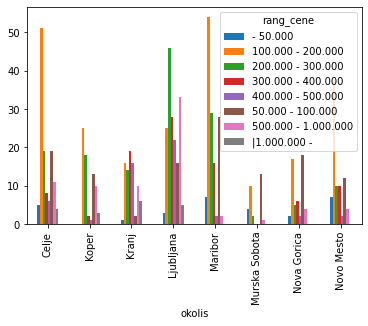

In [32]:
hura.plot.bar()

## Slovenija vs Hrvaška

Za konec si poglejmo še primerjavo nepremičnin iz Sloveinje in Hrvaške.

In [33]:
hise.groupby("drzava").mean()

,leto,cena,povrsina_zemljisca,povrsina_hise
drzava,,,,
Hrvaska,1988.927097,487308.176129,1016.302400,220.101935
Slovenija,1962.062073,317935.650634,3644.919276,227.195059


V Sloveniji imamo morda res starejše hiše a so te zato večje in cenejše.